In [1]:
import numpy as np
import pandas as pd
from scipy import stats

data = {
    'Participant': list(range(1, 25)),
    'Cloak': [True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False],
    'Mischief': [3, 1, 5, 4, 6, 4, 6, 2, 0, 5, 4, 5, 4, 3, 6, 6, 8, 5, 5, 4, 2, 5, 7, 5]
}

df = pd.DataFrame(data)

# Population size
population = df['Mischief'].count()

# Mean
mean = df['Mischief'].mean()

# Standard deviation
std_dev = df['Mischief'].std()

# Standard error of the mean
sem = stats.sem(df['Mischief'])

# Minimum and Maximum
min_value = df['Mischief'].min()
max_value = df['Mischief'].max()

population, mean, std_dev, sem, min_value, max_value


(24, 4.375, 1.8606333657491823, 0.37980019537356363, 0, 8)

Population size: 24 participants
Mean mischief count: 4.38
Standard deviation: 1.86
Standard error of the mean: 0.38
Minimum mischief count: 0
Maximum mischief count: 8

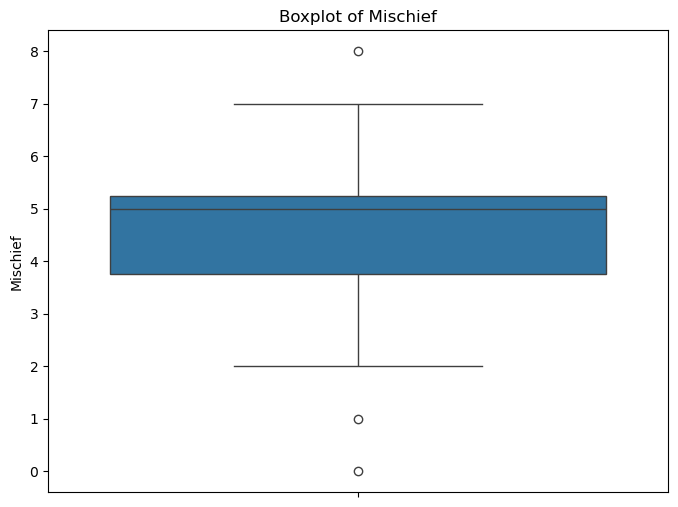

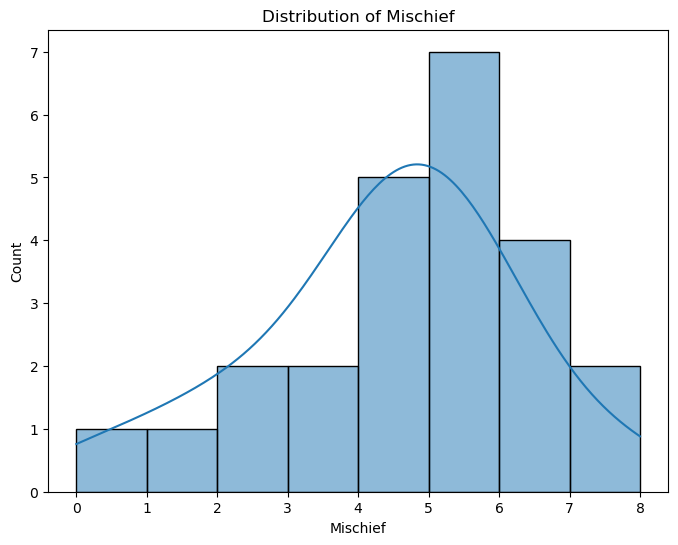

(0.9873612614421058, 0.3337394672746149)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# One-sample t-test and visualizations

# Boxplot to show outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['Mischief'])
plt.title('Boxplot of Mischief')
plt.show()

# Histogram to check normal distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Mischief'], kde=True)
plt.title('Distribution of Mischief')
plt.show()

# Performing the one-sample t-test 
t_stat, p_value = stats.ttest_1samp(df['Mischief'], popmean=4)

t_stat, p_value

t-statistic = 0.99
p-value = 0.33

This p-value indicates that we do not have enough evidence to reject the null hypothesis at a 95% confidence level, suggesting that the mean mischief committed is not significantly different from 4.

In [7]:
# Normality test (Shapiro-Wilk) and paired samples T-test

# Separate the data into those with cloaks and without cloaks
cloaks_true = df[df['Cloak'] == True]['Mischief']
cloaks_false = df[df['Cloak'] == False]['Mischief']

# Shapiro-Wilk normality test
shapiro_cloaks_true = stats.shapiro(cloaks_true)
shapiro_cloaks_false = stats.shapiro(cloaks_false)

shapiro_cloaks_true, shapiro_cloaks_false  # Normality results for both groups


(ShapiroResult(statistic=0.9127634937409539, pvalue=0.2314459072953191),
 ShapiroResult(statistic=0.9726166907872743, pvalue=0.9361892037703956))

Participants with cloaks: p-value = 0.23
Participants without cloaks: p-value = 0.94

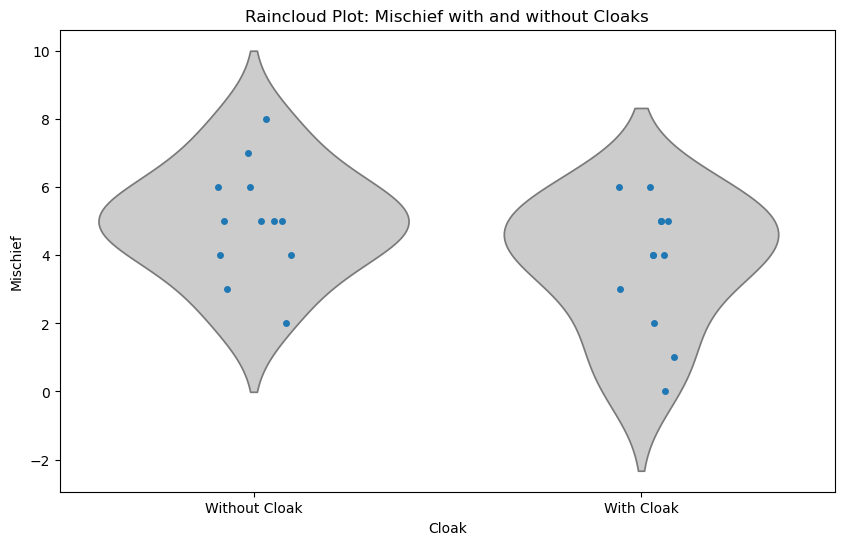

(0.2697547683923706,
 0.6086825890641905,
 -1.713459383965147,
 0.10068634487481125)

In [17]:
df = pd.DataFrame(data)

# Raincloud plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cloak', y='Mischief', data=df, inner=None, color=".8")
sns.stripplot(x='Cloak', y='Mischief', data=df, jitter=True)
plt.title('Raincloud Plot: Mischief with and without Cloaks')
plt.xticks([0, 1], ['Without Cloak', 'With Cloak'])
plt.show()

# Levene’s test for equality of variances
levene_stat, levene_p_value = stats.levene(cloaks_true, cloaks_false)

# Independent samples t-test
t_stat_ind, p_value_ind = stats.ttest_ind(cloaks_true, cloaks_false, equal_var=True)

levene_stat, levene_p_value, t_stat_ind, p_value_ind


Levene’s Test for Equality of Variances:
Levene’s statistic = 0.27
p-value = 0.61
This indicates that the variances between the two groups are not significantly different.

Independent Samples T-test:
t-statistic = -1.71
p-value = 0.10
Since the p-value is greater than 0.05, we fail to reject the null hypothesis, suggesting no significant difference in mischief between the groups with and without cloaks.

In [19]:
# One-way ANOVA to compare the two groups (with and without cloaks)
anova_stat, anova_p_value = stats.f_oneway(cloaks_true, cloaks_false)

anova_stat, anova_p_value


(2.9359430604982206, 0.1006863448748112)

F-statistic: 2.94
p-value: 0.10

Since the p-value is greater than 0.05, we do not have enough evidence to reject the null hypothesis. This suggests that there is no statistically significant difference in mischief between participants with cloaks and those without cloaks.